<h1><center><font color=purple>Plotting a choropleth map of Zurich's city districts</font></center></h1>
<h4><center><font color=purple>(3) using code snippets generated by chatGPT</font></center></h4>

***

<strong>Key objectives:<br></strong>Create a region map (choropleth map) of Zurich's city districts using <b> code snippets generated by chatGPT</b>. Information for districts should be shown by coloring each disctrict according to a corresponding value. The color palette should be shown in a legend. Ideally the map should be interactive.

<strong>Dataset:<br></strong> (1) <i>'Generalisierte Gemeindegrenzen (OGD) (kantonaler Datensatz)'</i> from https://www.stadt-zuerich.ch/geodaten/

<h3><left><font color=purple>Contents:</font></left></h3>

[1. ChatGPT Chat](#section-1-title)

[2. Import and plot shapefiles](#section-2-title)

[3. Color districts according to some data](#section-3-title)

[4. Plot districts in interactive map](#section-4-title)
***

<a id='section-1-title'></a>
[<h3><font color=purple>1. ChatGPT Chat</font></h3>](#section-1-title)

Check out the following chatGPT chat for the code snippets used in this workbook: https://chat.openai.com/share/2bd763a4-5362-4880-88c4-6a3b78440f67

<a id='section-2-title'></a>
[<h3><font color=purple>2. Import and plot shapefiles</font></h3>](#section-2-title)

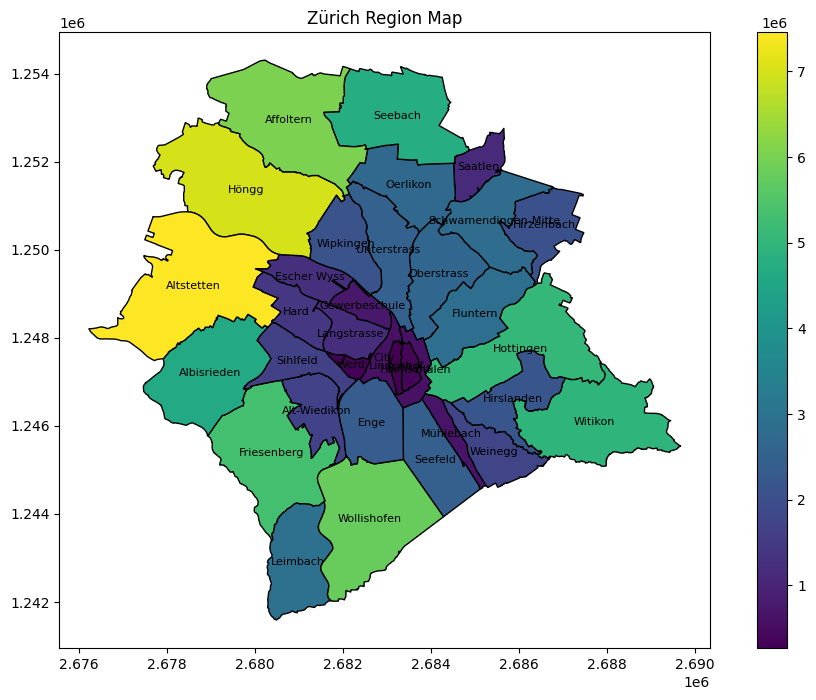

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = 'data/raw/stadtkreise/UP_GEMEINDEN_STADTQUARTIERE_F.shp' # Replace with the actual path to your shapefile
gdf = gpd.read_file(shapefile_path)

# Filter data where 'GEMEINDENA' is equal to 'Zürich'
zurich_gdf = gdf[gdf['GEMEINDENA'] == 'Zürich']

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot shapes with color based on 'SHAPE_AREA'
zurich_gdf.plot(ax=ax, column='SHAPE_AREA', cmap='viridis', legend=True, edgecolor='black')

# Label each shape with 'QUARTIERNA' at the center
for x, y, label in zip(zurich_gdf.geometry.centroid.x, zurich_gdf.geometry.centroid.y, zurich_gdf['QUARTIERNA']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Set plot title
plt.title('Zürich Region Map')

# Show the plot
plt.show()


<a id="section-3-title"></a>
[<h3><font color=purple>3. Highlight some of Zürich's districts</font></h3>](#section-3-title)

/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


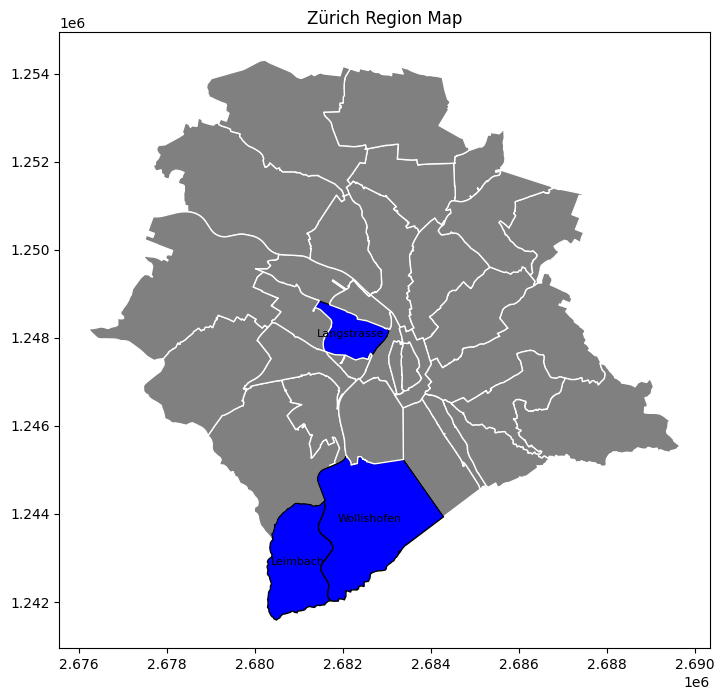

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_shapes_by_names(shapefile_path, names_to_highlight):
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Filter data where 'GEMEINDENA' is equal to 'Zürich'
    zurich_gdf = gdf[gdf['GEMEINDENA'] == 'Zürich']

    # Create a new column 'color' to store colors based on conditions
    zurich_gdf['color'] = 'grey'
    zurich_gdf['edge_color'] = 'white'
    
    zurich_gdf.loc[zurich_gdf['QUARTIERNA'].isin(names_to_highlight), 'color'] = 'blue'
    zurich_gdf.loc[zurich_gdf['QUARTIERNA'].isin(names_to_highlight), 'edge_color'] = 'black'

    # Plot the map
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot shapes with color based on the 'color' column
    zurich_gdf.plot(ax=ax, color=zurich_gdf['color'], edgecolor=zurich_gdf['edge_color'])

    # Label each shape with 'QUARTIERNA' at the center if it's in the list
    for x, y, label in zip(zurich_gdf.geometry.centroid.x, zurich_gdf.geometry.centroid.y, zurich_gdf['QUARTIERNA']):
        if label in names_to_highlight:
            ax.text(x, y, label, fontsize=8, ha='center', va='center')

    # Set plot title
    plt.title('Zürich Region Map')

    # Show the plot
    plt.show()

# Example usage:


names_to_highlight = ['Leimbach', 'Wollishofen', 'Langstrasse']  # Replace with the names you want to highlight
plot_shapes_by_names('data/raw/stadtkreise/UP_GEMEINDEN_STADTQUARTIERE_F.shp', names_to_highlight)


<a id="section-4-title"></a>
[<h3><font color=purple>4. Plot districts in interactive map</font></h3>](#section-4-title)

In [9]:
import geopandas as gpd
import folium
from folium import Choropleth, Marker

# Load the shapefile
shapefile_path = 'data/raw/stadtkreise/UP_GEMEINDEN_STADTQUARTIERE_F.shp'  # Replace with the actual path to your shapefile
gdf = gpd.read_file(shapefile_path)

# Filter data where 'GEMEINDENA' is equal to 'Zürich'
zurich_gdf = gdf[gdf['GEMEINDENA'] == 'Zürich']

# Convert the GeoDataFrame to EPSG:4326 for Folium
zurich_gdf_4326 = zurich_gdf.to_crs(epsg=4326)

# Create a Folium map centered around Zürich
m = folium.Map(location=[zurich_gdf_4326.geometry.centroid.y.mean(), zurich_gdf_4326.geometry.centroid.x.mean()], zoom_start=12)

# Add Choropleth layer for coloring based on 'SHAPE_AREA'
Choropleth(
    geo_data=zurich_gdf_4326,
    data=zurich_gdf_4326,
    columns=['QUARTIERNA', 'SHAPE_AREA'],
    key_on='feature.properties.QUARTIERNA',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='SHAPE_AREA'
).add_to(m)

# Add markers to the map directly showing 'QUARTIERNA'
for idx, row in zurich_gdf_4326.iterrows():
    tooltip_text = f"SHAPE_AREA: {row['SHAPE_AREA']}"
    folium.Marker(
        location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
        icon=None,
        tooltip=tooltip_text,
        popup=row['QUARTIERNA'],  # You can remove this line if you don't want popups
    ).add_to(m)

# Display the map
m


/var/folders/mc/m_k2wlrx30725ghkjs75z2700000gn/T/ipykernel_9320/2676629926.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[zurich_gdf_4326.geometry.centroid.y.mean(), zurich_gdf_4326.geometry.centroid.x.mean()], zoom_start=12)


<a id="section-5-title"></a>
[<h3><font color=purple>5. Discussion</font></h3>](#section-5-title)

(1) It's quite impressive how well chatGPT solved this visualization problem.<br>

(2) However, when highlighting some of Zurichs districts (chapter 3), chatGPT chose a solution which does not provide clean output at the boarders of the districts.<br>

(3) Also, chatGPT used several attempts until the interactive map was working. And eventually it was not able to annotate the interactive folium map with text, despite asking specifically about this multiple times. The text is still displayed as markers where one has to click in order to see the text.<br>

(4) Additionally, sometimes I had to request the same thing several times in order of chatGPT to pick it up.